<a href="https://colab.research.google.com/github/kulvanth5/Inferential-Statistics/blob/main/Normalisation%20of%20wine%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

features = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

df = pd.read_csv('/content/wine.data',names=features)

df.shape

(178, 14)

In [2]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: xlabel='Magnesium', ylabel='Count'>

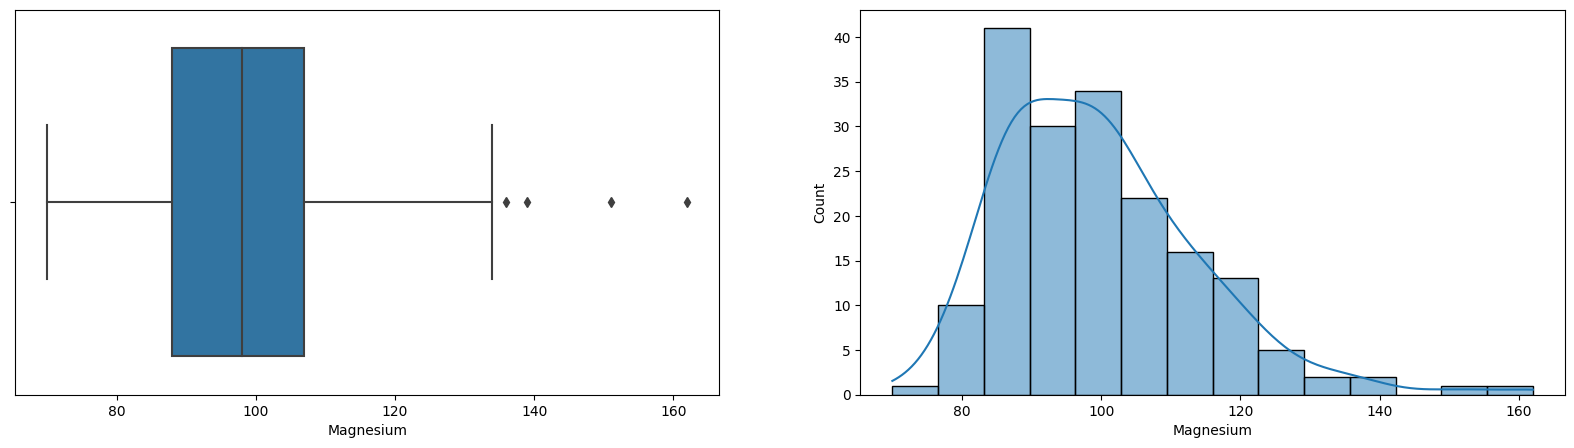

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1,2,figsize=(20,5))

sn.boxplot(ax=axes[0],x='Magnesium',data=df)
sn.histplot(ax=axes[1],x='Magnesium',data=df,kde=True)

In [4]:
df.skew()

class                           0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

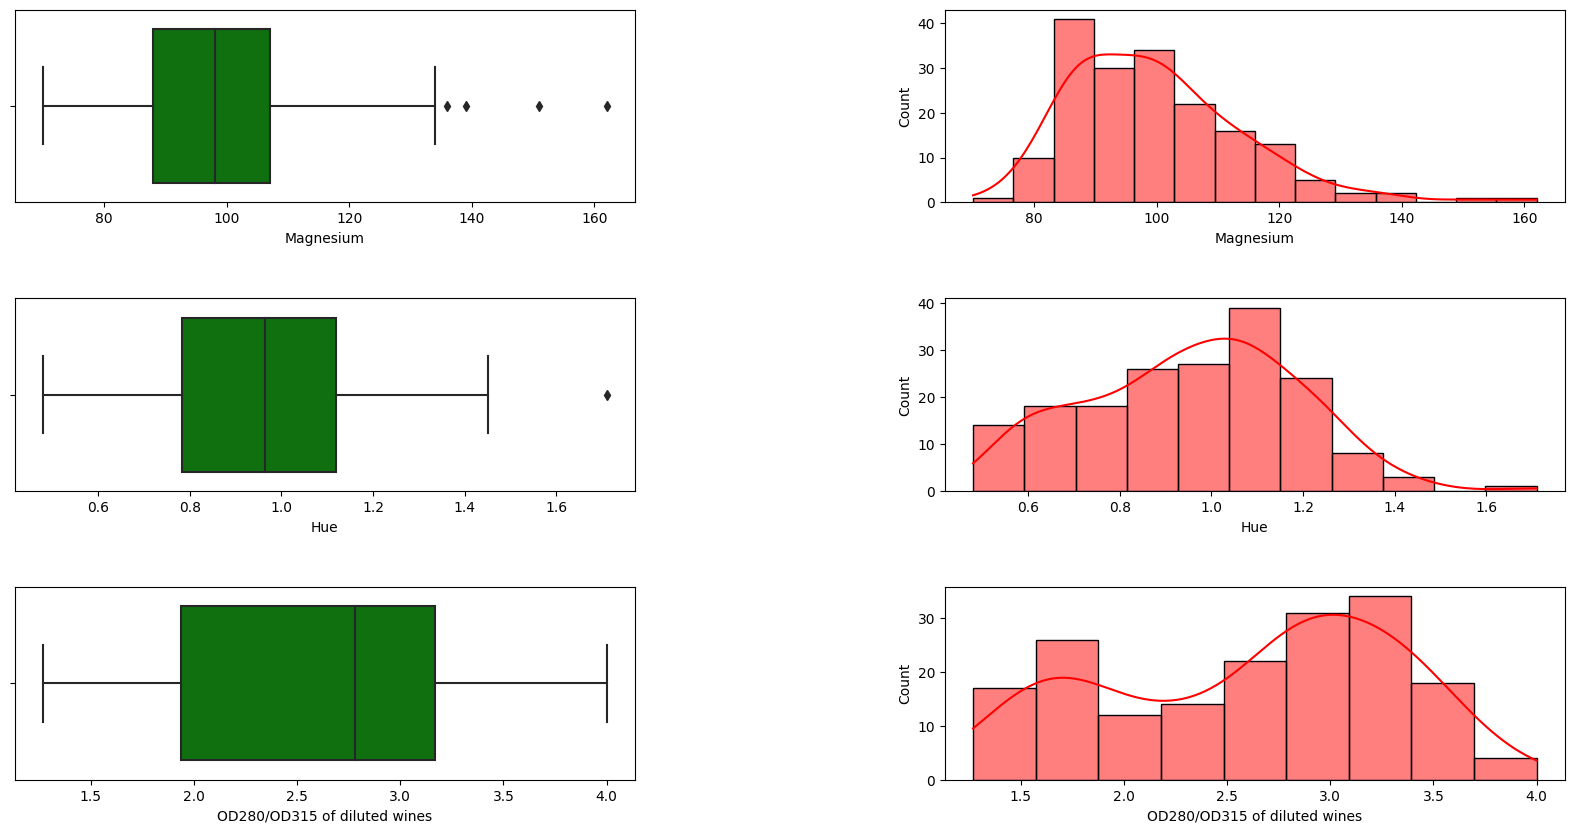

In [5]:
fig , axes = plt.subplots(3,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)

f = ['Magnesium','Hue','OD280/OD315 of diluted wines']

i = 0

for i in range(len(f)):
  sn.boxplot(ax=axes[i,0],x=f[i],data=df,color='green')
  sn.histplot(ax=axes[i,1],x=f[i],data=df,color='red',kde=True)
  i = i + 1

plt.savefig('box & hist')

(0.8382312628407997, 0.6014446889284105, 1.098191054755161)

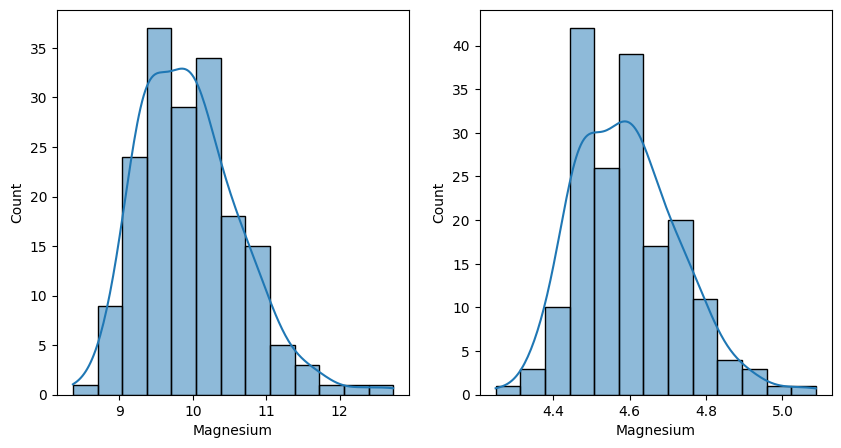

In [6]:
import numpy as np

root_x = df['Magnesium']**0.5
lnx = np.log(df['Magnesium'])

fig , axes = plt.subplots(1,2,figsize=(10,5))
sn.histplot(ax=axes[0],x=df['Magnesium']**0.5,data=df,kde=True)
sn.histplot(ax=axes[1],x=np.log(df['Magnesium']),data=df,kde=True)

root_x.skew() , lnx.skew() , df['Magnesium'].skew()

<Axes: xlabel='Magnesium', ylabel='Count'>

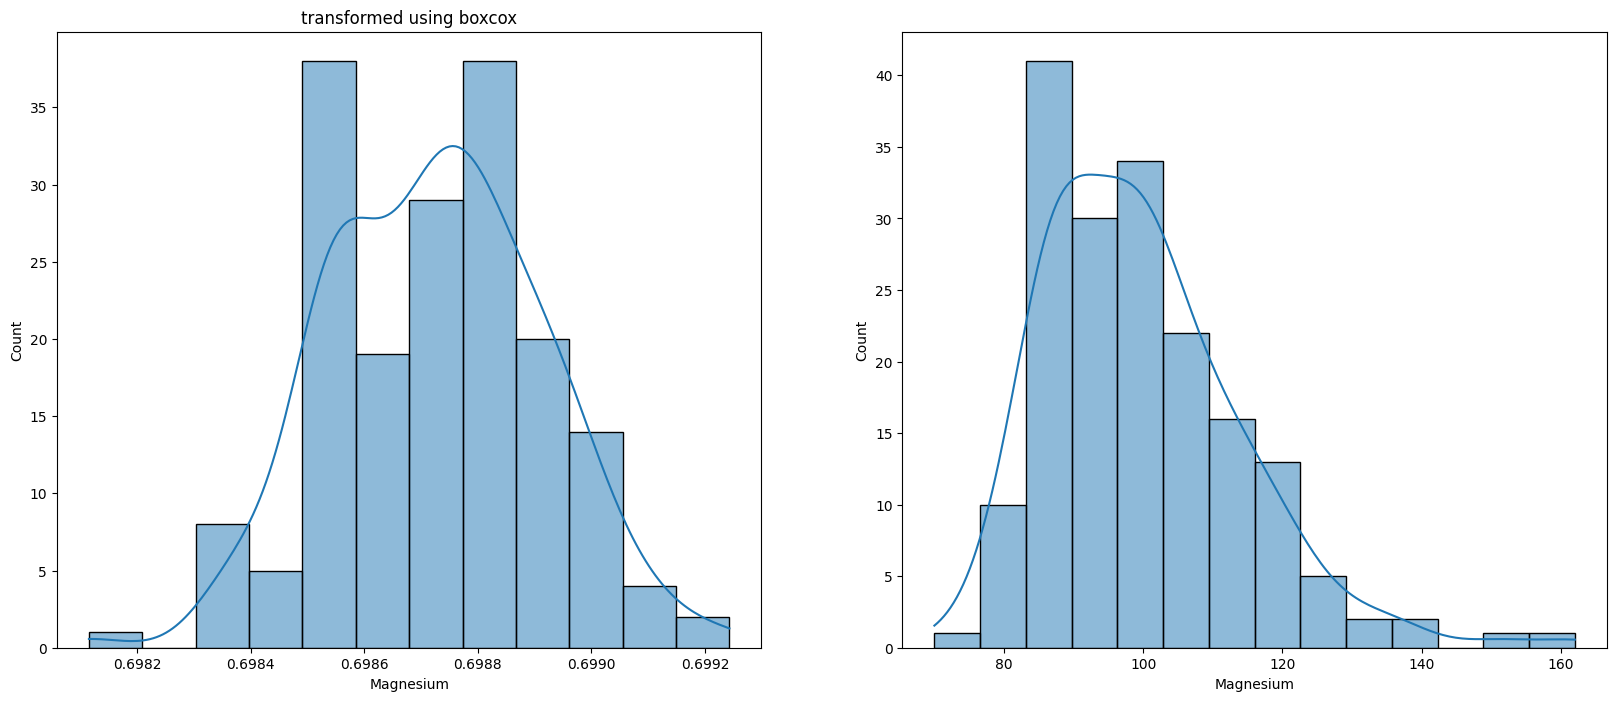

In [65]:
from scipy import stats

tf , st = stats.boxcox(df['Magnesium'])

f = (df['Magnesium']**st - 1)/st

f.skew()

fig , axes = plt.subplots(1,2,figsize=(20,8))
sn.histplot(ax=axes[0],x=f,kde=True)
axes[0].set_title('transformed using boxcox')
sn.histplot(ax=axes[1],x=df['Magnesium'],data=df,kde=True)

Text(0.5, 1.0, 'Original distribution')

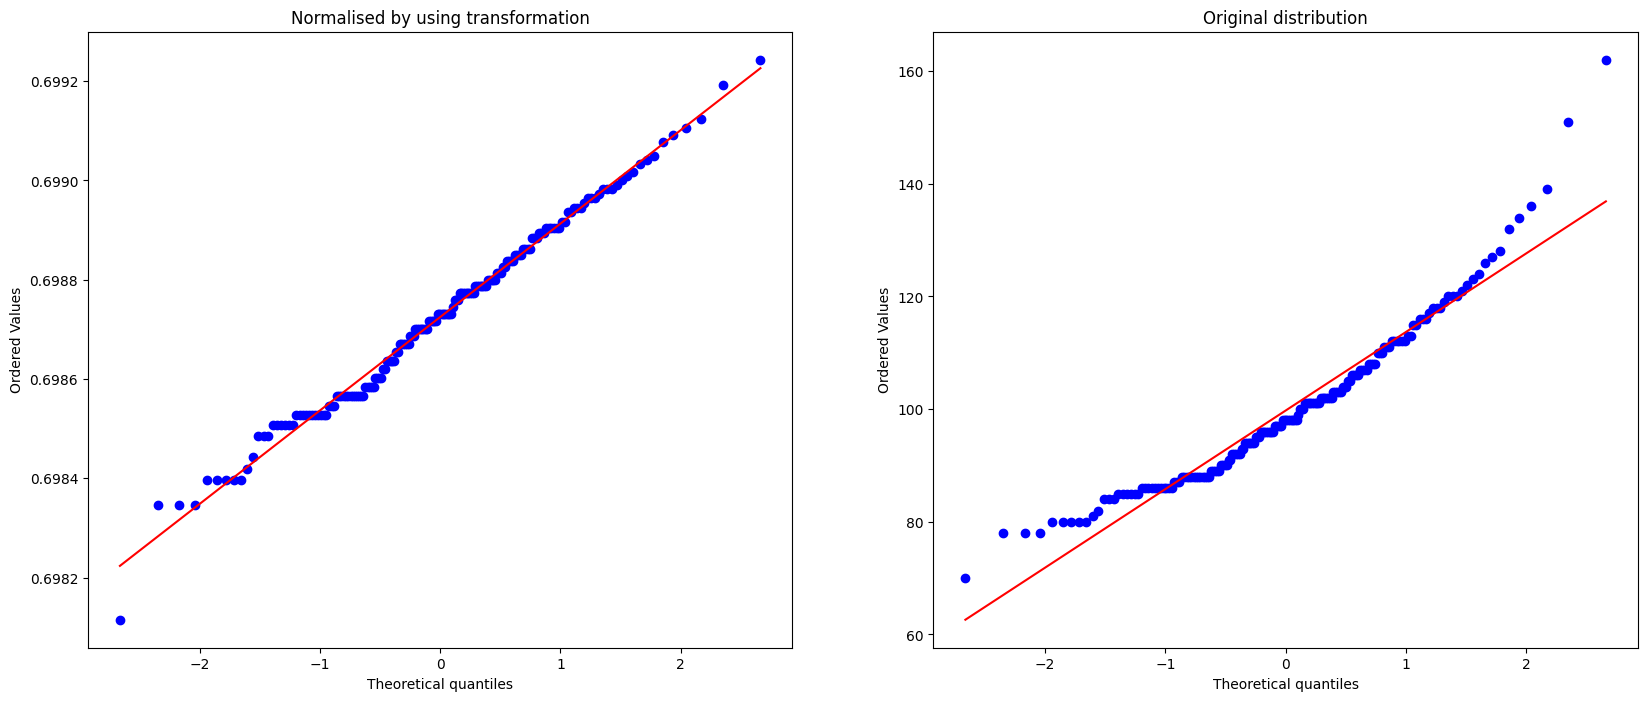

In [8]:
fig , axes = plt.subplots(1,2,figsize=(20,8))

res = stats.probplot(f,plot=axes[0])
axes[0].set_title('Normalised by using transformation')

res1 = stats.probplot(df['Magnesium'],plot=axes[1])
axes[1].set_title('Original distribution')

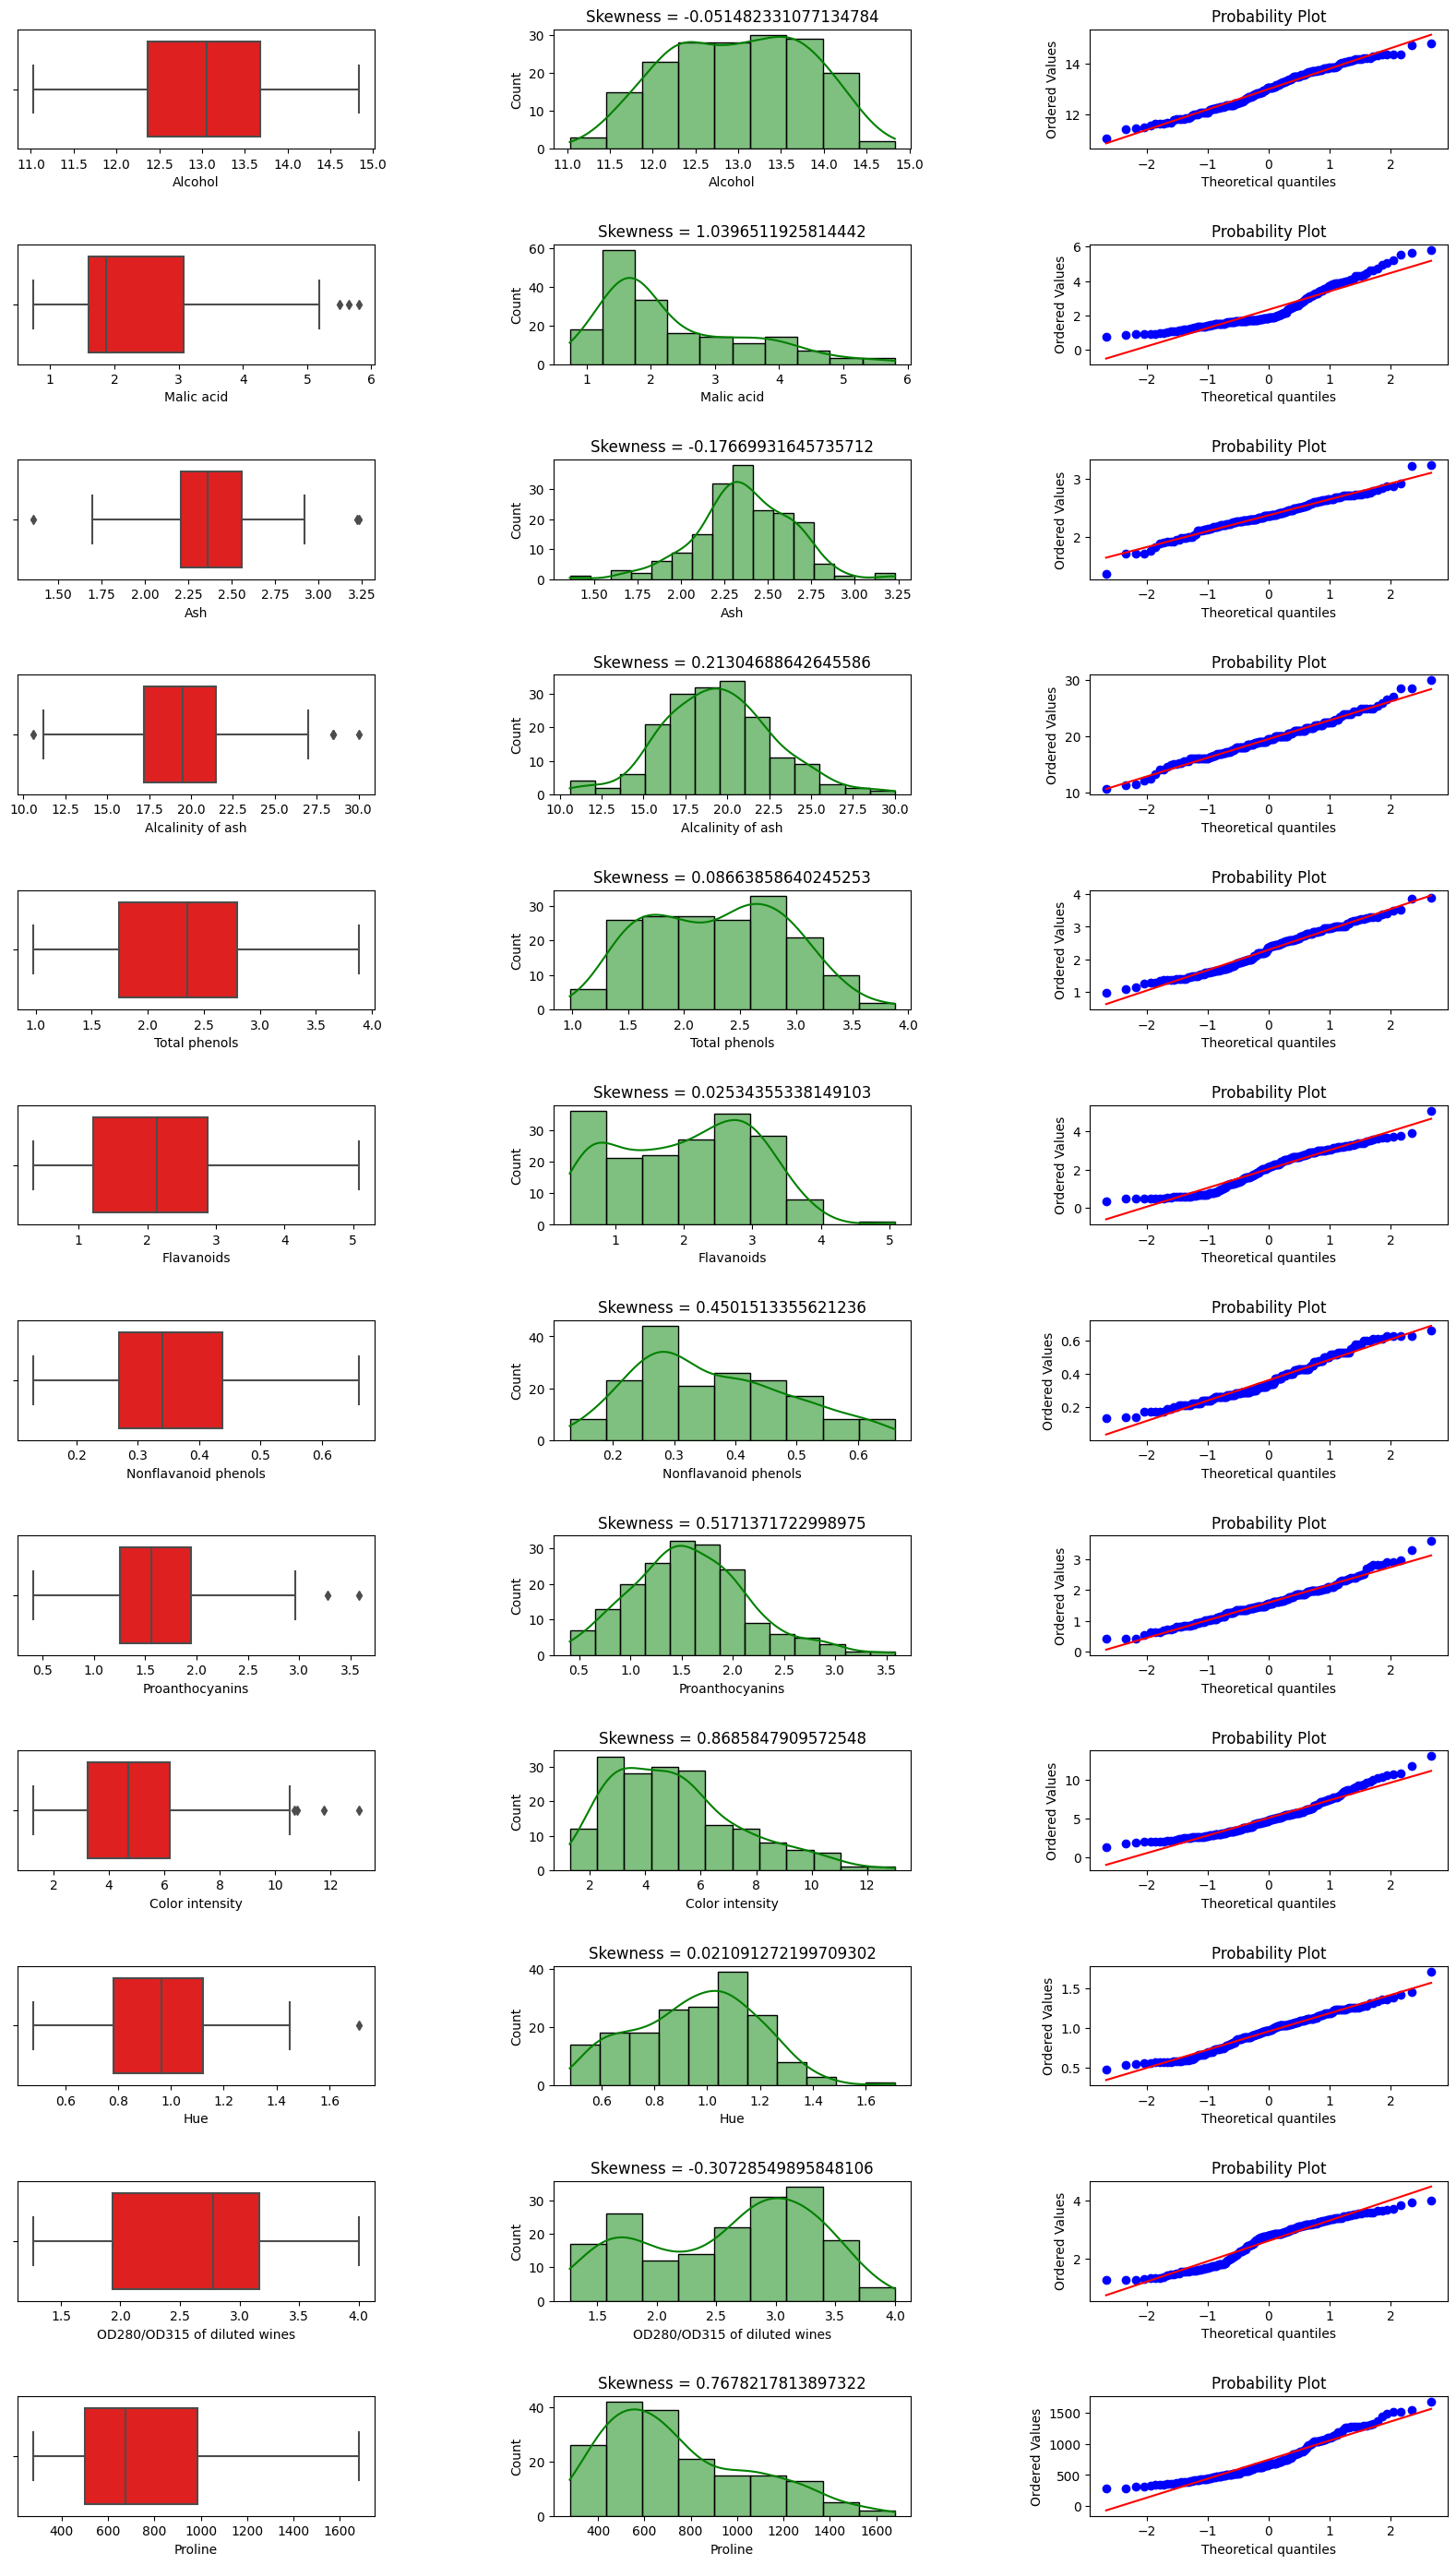

In [83]:
fig , axes = plt.subplots(12,3,figsize=(20,35))
fig.subplots_adjust(hspace=0.8,wspace=0.5)

def plot(df,i,col):
    sn.boxplot(ax=axes[i,0],x=col,data=df,color='red')
    sn.histplot(ax=axes[i,1],x=col,data=df,kde=True,color='green').set(title=f'Skewness = {df[col].skew()}')
    stats.probplot(df[col],plot=axes[i,2])

i = 0

for f in df.columns:

  if f != 'class' and f != 'Magnesium':
      plot(df,i,f)
      i = i + 1


Samples wrt to

alcohol are most approximate to normal distribution with skewness -0.05

malic acid are right-skewed , therefore most of the samples have less %

ash is a bit left-skewed

alcalinity of ash is right skewed

total phenols is approx to normal distribution and hardly have any outliers




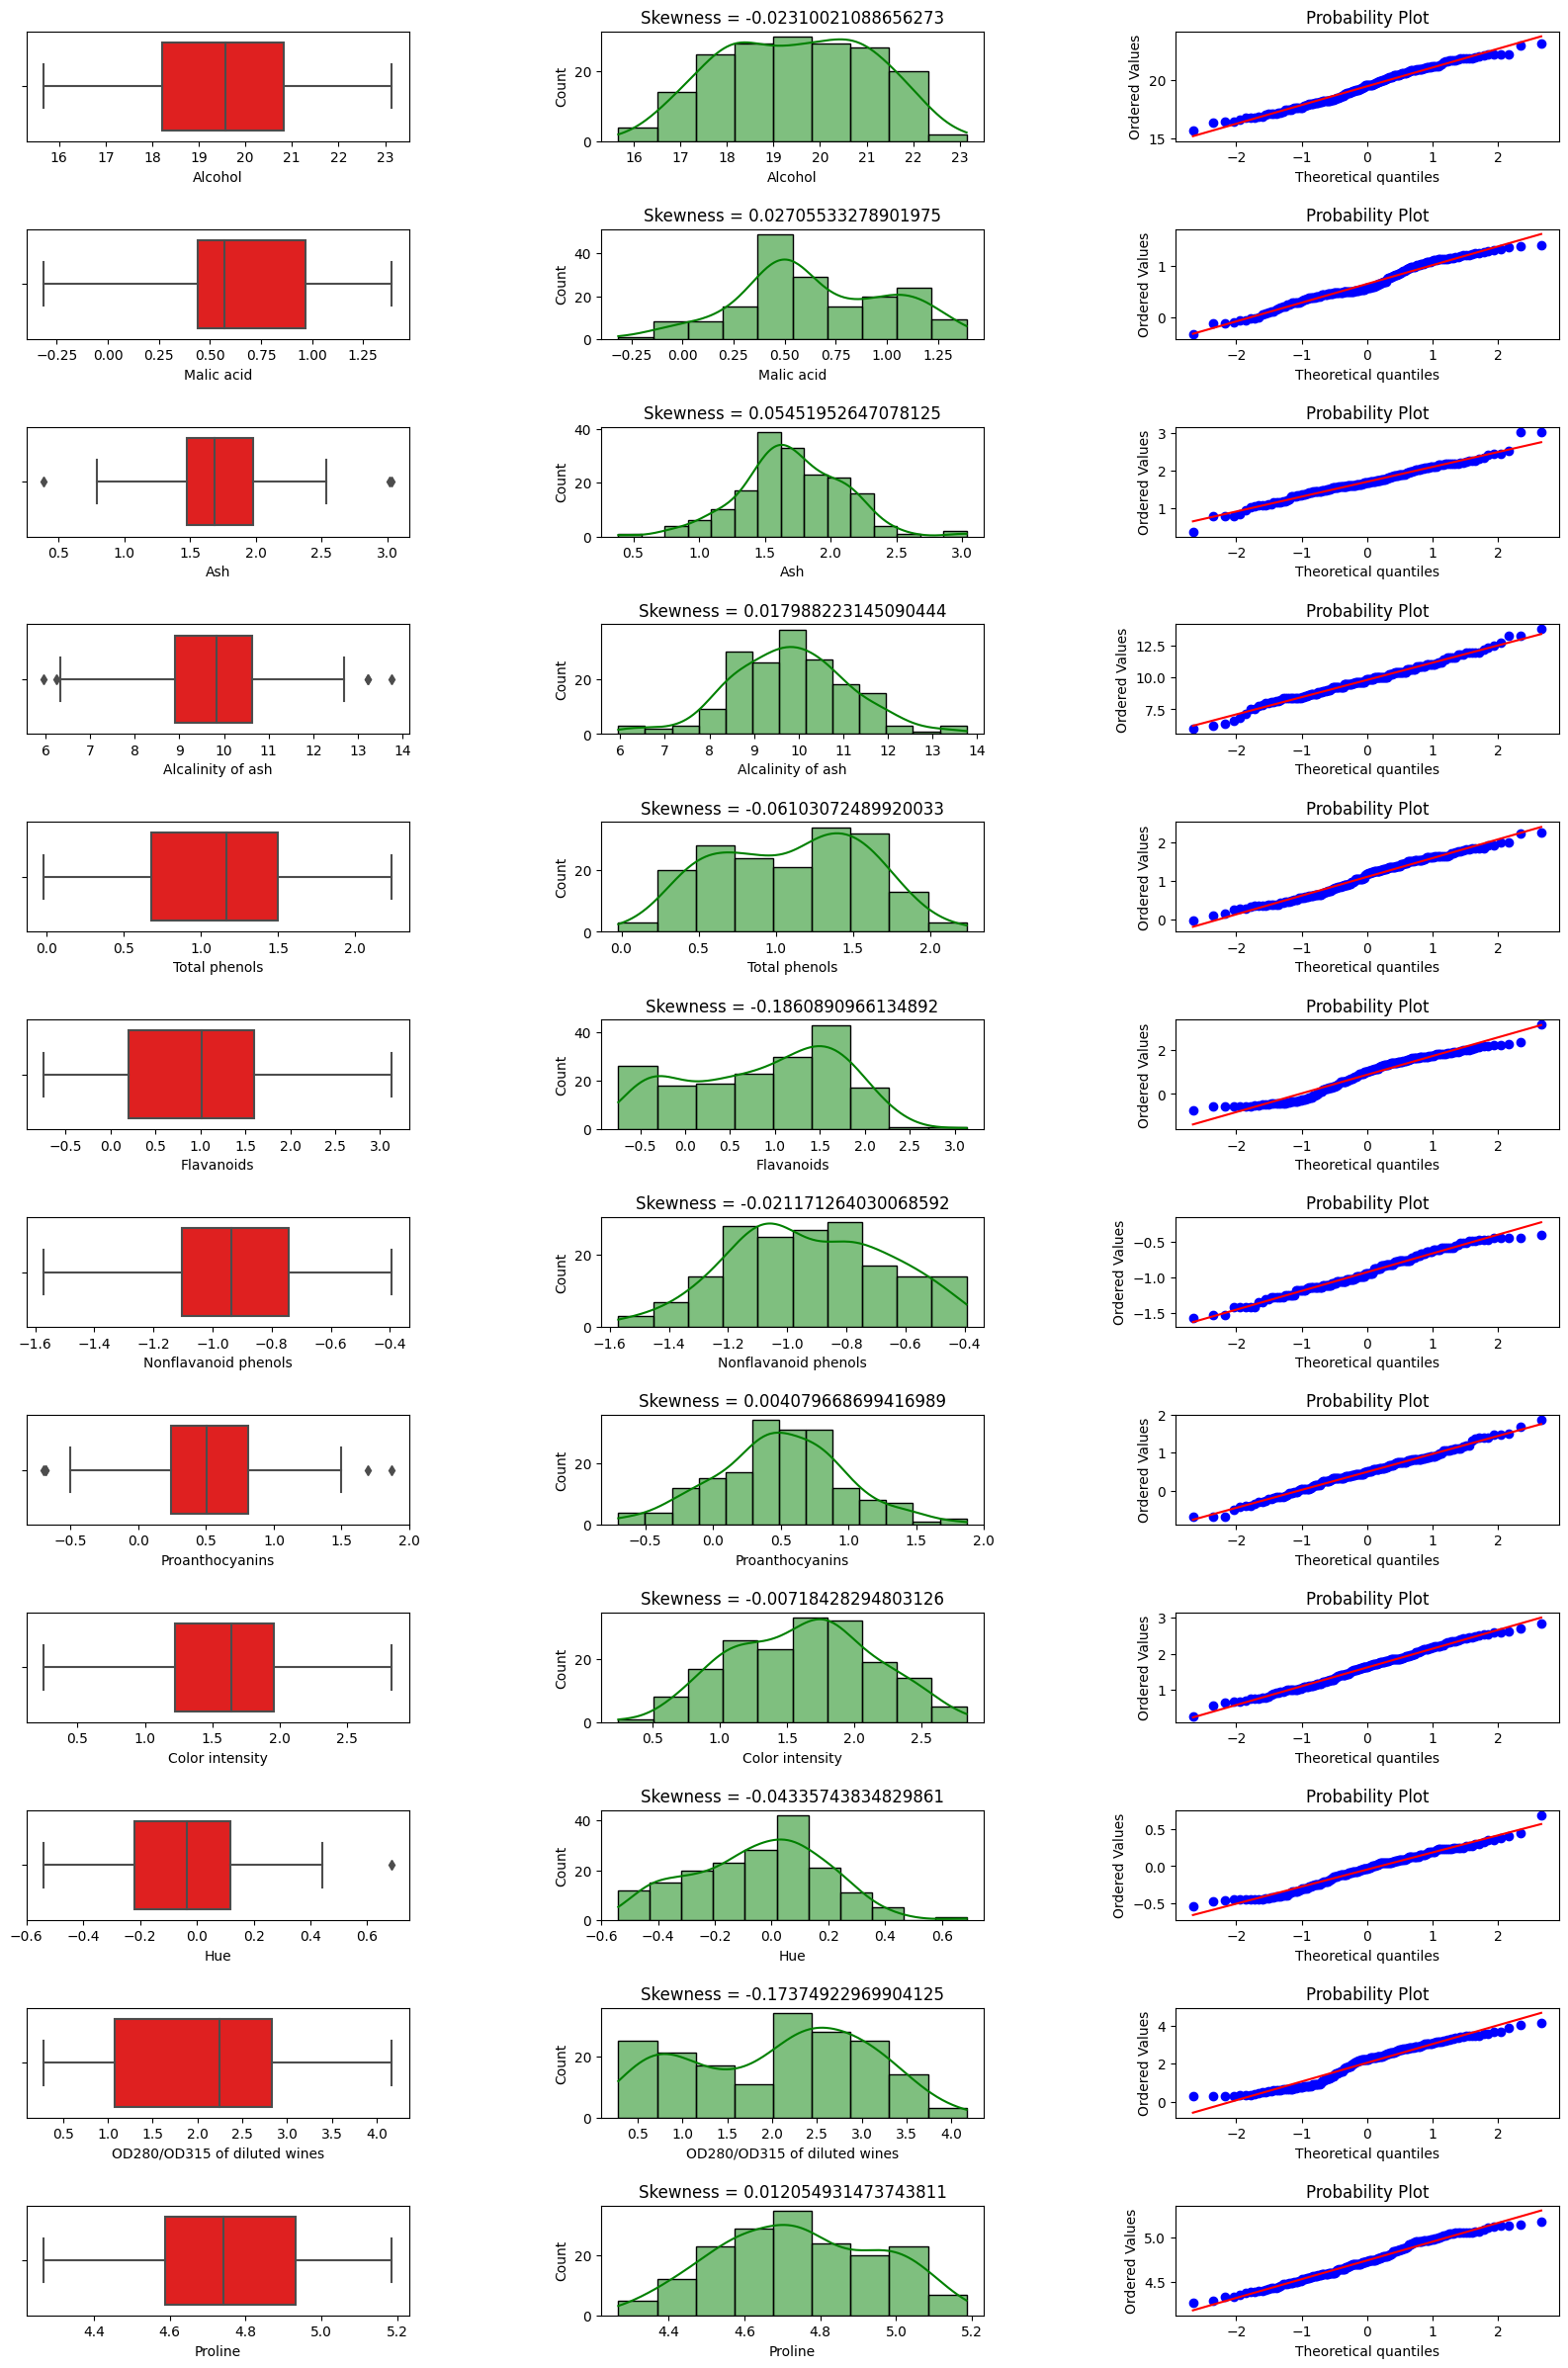

In [82]:
fig , axes = plt.subplots(12,3,figsize=(20,30))
fig.subplots_adjust(hspace=0.8,wspace=0.5)

i = 0

original_skews = df.skew()
lambdas , transformed_skews = [] , []

for f in df.columns:

  tf , lmd = stats.boxcox(df[f])
  lambdas.append(lmd)
  fx = (df[f]**lmd - 1)/lmd
  transformed_skews.append(fx.skew())

  if f != 'class' and f != 'Magnesium':

    sn.boxplot(ax=axes[i,0],x=fx,color='red')
    sn.histplot(ax=axes[i,1],x=fx,kde=True,color='green').set(title=f'Skewness = {fx.skew()}')
    stats.probplot(fx,plot=axes[i,2])
    i = i + 1


In [77]:
temp = {
    'original_skews':list(original_skews),
    'lambdas':lambdas,
    'transformed_skews':transformed_skews,
}

values = pd.DataFrame(temp)

values

,original_skews,lambdas,transformed_skews
0,0.107431,0.481960,-0.100491
1,-0.051482,1.264583,-0.023100
2,1.039651,-0.277755,0.027055
3,-0.176699,1.427480,0.054520
4,0.213047,0.691972,0.017988
5,1.098191,-1.429123,0.006353
6,0.086639,0.685923,-0.061031
7,0.025344,0.734977,-0.186089
8,0.450151,0.268087,-0.021171
9,0.517137,0.567416,0.004080
